# ¡Hola, Fernando!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

In [189]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from joblib import dump
from matplotlib import pyplot
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

## Preparación de datos

In [190]:
df = pd.read_csv('/datasets/car_data.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [192]:
df.shape

(354369, 16)

In [193]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
124676,15/03/2016 18:49,6700,NaN,2017,manual,320,a4,150000,5,NaN,audi,no,15/03/2016 00:00,0,83561,06/04/2016 20:45
215251,15/03/2016 23:58,1650,convertible,1999,manual,136,slk,150000,1,petrol,mercedes_benz,yes,15/03/2016 00:00,0,42651,22/03/2016 09:47
171697,03/04/2016 20:46,11600,coupe,1987,manual,160,other,150000,11,petrol,porsche,no,03/04/2016 00:00,0,29392,05/04/2016 21:45
40477,22/03/2016 17:36,2000,sedan,2006,manual,110,corolla,150000,4,petrol,toyota,yes,22/03/2016 00:00,0,79189,22/03/2016 17:36
22211,26/03/2016 09:36,0,NaN,2000,manual,90,golf,150000,5,NaN,volkswagen,NaN,26/03/2016 00:00,0,39606,01/04/2016 22:15
180957,14/03/2016 17:50,9999,sedan,2007,manual,300,leon,150000,4,petrol,seat,no,14/03/2016 00:00,0,91358,06/04/2016 01:15
181733,25/03/2016 10:48,6300,sedan,2002,auto,231,5er,150000,7,petrol,bmw,NaN,25/03/2016 00:00,0,85757,29/03/2016 23:18
35824,27/03/2016 13:49,13990,wagon,2011,manual,160,insignia,90000,6,gasoline,opel,no,27/03/2016 00:00,0,32339,07/04/2016 09:46
333357,02/04/2016 12:51,1050,small,1999,manual,75,golf,150000,7,petrol,volkswagen,NaN,02/04/2016 00:00,0,91614,02/04/2016 12:51
324109,11/03/2016 14:52,400,NaN,2016,manual,0,lupo,150000,0,NaN,volkswagen,yes,11/03/2016 00:00,0,91275,12/03/2016 19:45


In [194]:
df.columns = df.columns.str.lower()

In [195]:
df = df.rename(columns=
               {
    'datecrawled':'date_crawled',
    'vehicletype':'vehicle_type',
    'registrationyear':'registration_year',  
    'registrationmonth':'registration_month',
    'fueltype':'fuel_type', 
    'notrepaired':'not_repaired', 
    'datecreated':'date_created', 
    'numberofpictures':'number_of_pictures', 
    'postalcode':'postal_code',
    'lastseen':'last_seen'             
    }
                )

In [196]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format = '%d/%m/%Y %H:%M')

In [197]:
df['date_created'] = pd.to_datetime(df['date_created'], format = '%d/%m/%Y %H:%M')

In [198]:
df['last_seen'] = pd.to_datetime(df['last_seen'], format = '%d/%m/%Y %H:%M')

### Eliminación de datos ausentes en model

In [199]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
mileage                   0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [200]:
df = df.dropna(subset=['model']).reset_index(drop=True)

### Eliminación de datos ausentes en vehicle_type

In [201]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type          30662
registration_year         0
gearbox               15702
power                     0
model                     0
mileage                   0
registration_month        0
fuel_type             25732
brand                     0
not_repaired          62100
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [202]:
model_by_type = pd.DataFrame(df.groupby('model')['vehicle_type'].value_counts())

In [203]:
model_by_type.columns = ['count']

In [204]:
model_by_type.reset_index(inplace=True)

In [205]:
df['vehicle_type'].fillna('unknown',inplace=True)

In [206]:
def replace_vehicle_type(row):
    vehicle_type_1=row['vehicle_type']
    
    if vehicle_type_1=='unknown':
        model_1 = row['model']
        replacement_value=model_by_type.loc[(model_by_type['model']==model_1)]['vehicle_type'].values[0]
        
        
        return replacement_value
    else:
        return vehicle_type_1

In [207]:
df['vehicle_type'] = df.apply(replace_vehicle_type, axis=1)

### Eliminación de datos ausentes en gearbox

In [208]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox               15702
power                     0
model                     0
mileage                   0
registration_month        0
fuel_type             25732
brand                     0
not_repaired          62100
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [209]:
model_by_gearbox = pd.DataFrame(df.groupby('model')['gearbox'].value_counts())

In [210]:
model_by_gearbox.columns = ['count']

In [211]:
model_by_gearbox.reset_index(inplace=True)

In [212]:
df['gearbox'].fillna('unknown',inplace=True)

In [213]:
def replace_gearbox(row):
    gearbox_1=row['gearbox']
    
    if gearbox_1=='unknown':
        model_1 = row['model']
        replacement_value=model_by_gearbox.loc[(model_by_gearbox['model']==model_1)]['gearbox'].values[0]
        
        
        return replacement_value
    else:
        return gearbox_1

In [214]:
df['gearbox'] = df.apply(replace_gearbox, axis=1)

### Eliminación de datos ausentes en fuel_type

In [215]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                     0
mileage                   0
registration_month        0
fuel_type             25732
brand                     0
not_repaired          62100
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [216]:
model_by_fuel = pd.DataFrame(df.groupby('model')['fuel_type'].value_counts())

In [217]:
model_by_fuel.columns = ['count']

In [218]:
model_by_fuel.reset_index(inplace=True)

In [219]:
df['fuel_type'].fillna('unknown',inplace=True)

In [220]:
def replace_fuel_type(row):
    fuel_type_1=row['fuel_type']
    
    if fuel_type_1=='unknown':
        model_1 = row['model']
        replacement_value=model_by_fuel.loc[(model_by_fuel['model']==model_1)]['fuel_type'].values[0]
        
        
        return replacement_value
    else:
        return fuel_type_1

In [221]:
df['fuel_type'] = df.apply(replace_fuel_type, axis=1)

### Eliminación de datos ausentes en not_repaired

In [222]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                     0
mileage                   0
registration_month        0
fuel_type                 0
brand                     0
not_repaired          62100
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [223]:
df['not_repaired'].fillna('unknown',inplace=True)

In [224]:
df.shape

(334664, 16)

### Eliminación de datos atípicos

In [225]:
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [226]:
df.loc[:,['price','registration_year','power']].describe()

,price,registration_year,power
count,334664.000000,334664.000000,334664.000000
mean,4504.346790,2003.923992,111.373195
std,4531.438572,69.377219,185.156439
min,0.000000,1000.000000,0.000000
25%,1150.000000,1999.000000,70.000000
50%,2800.000000,2003.000000,105.000000
75%,6500.000000,2008.000000,143.000000
max,20000.000000,9999.000000,20000.000000


In [227]:
IQR_prc = df['price'].quantile(0.75) - df['price'].quantile(0.25)
LIQR_prc = df['price'].quantile(0.25)-1.5*IQR_prc
UIQR_prc = df['price'].quantile(0.75)+1.5*IQR_prc

In [228]:
IQR_reg_yr = df['registration_year'].quantile(0.75) - df['registration_year'].quantile(0.25)
LIQR_reg_yr = df['registration_year'].quantile(0.25)-1.5*IQR_reg_yr
UIQR_reg_yr = df['registration_year'].quantile(0.75)+1.5*IQR_reg_yr

In [229]:
IQR_pwr = df['power'].quantile(0.75) - df['power'].quantile(0.25)
LIQR_pwr = df['power'].quantile(0.25)-1.5*IQR_pwr
UIQR_pwr = df['power'].quantile(0.75)+1.5*IQR_pwr

In [230]:
df = df.query('price>100 and price<@UIQR_prc and registration_year>@LIQR_reg_yr and registration_year<@UIQR_reg_yr and power>50 and power<@UIQR_pwr ')

In [231]:
df.shape

(260365, 16)

<AxesSubplot:>

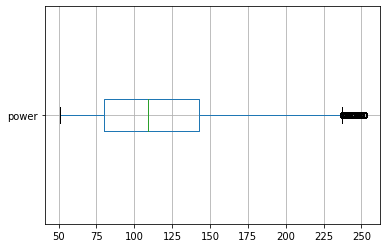

In [232]:
df.boxplot(column='power', vert=False)

<AxesSubplot:>

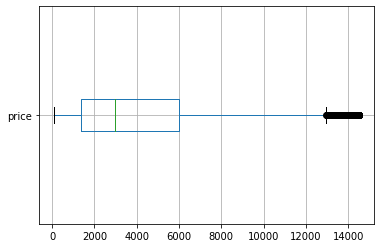

In [233]:
df.boxplot(column='price', vert=False)

<AxesSubplot:>

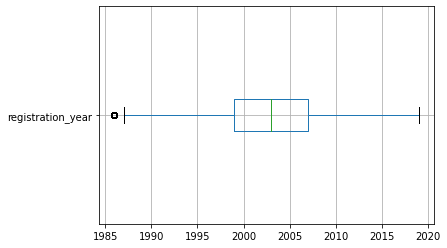

In [234]:
df.boxplot(column='registration_year', vert=False)

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Listo con el reemplazo de datos en not_repaired para evitar la eliminación de datos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Listo con los valores atípicos de power y reg_year utilizando los rangos intercuartiles superiores e inferiores.
</div>

### Análisis cuantitativo de los datos de vehículos disponibles

<AxesSubplot:title={'center':'TOP 10 de marcas disponibles en venta'}>

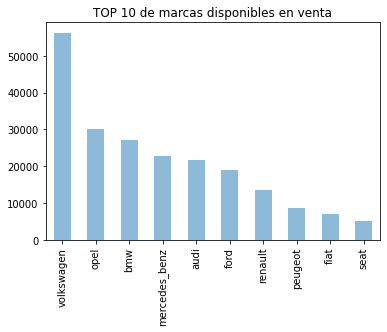

In [161]:
df['brand'].value_counts().head(10).plot(kind='bar', alpha=0.5, title = 'TOP 10 de marcas disponibles en venta')

<AxesSubplot:title={'center':'TOP 10 de modelos disponibles en venta'}>

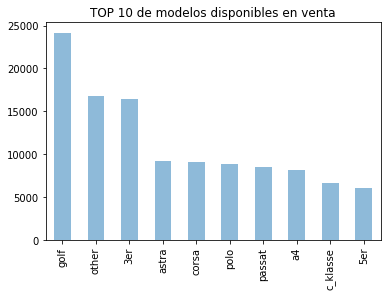

In [162]:
df['model'].value_counts().head(10).plot(kind='bar', alpha=0.5, title = 'TOP 10 de modelos disponibles en venta')

<AxesSubplot:title={'center':'TOP 10 de tipos disponibles en venta'}>

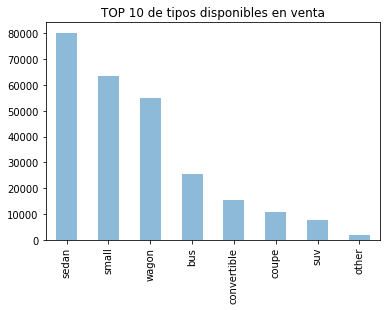

In [163]:
df['vehicle_type'].value_counts().head(10).plot(kind='bar', alpha = 0.5, title = 'TOP 10 de tipos disponibles en venta')

Text(0.5, 1.0, 'Distribución de precios disponibles en venta')

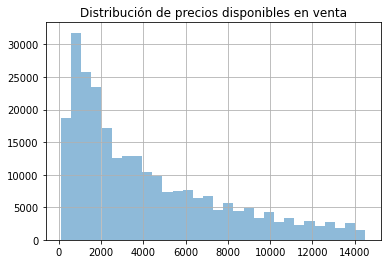

In [164]:
df.hist('price', bins=30, alpha=0.5)
plt.title("Distribución de precios disponibles en venta")

## Entrenamiento del modelo 

In [165]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [166]:
data_non_numeric = df.loc[:,['vehicle_type','gearbox','model','fuel_type','brand','not_repaired','postal_code']]

In [167]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data_non_numeric), columns=data_non_numeric.columns)

In [168]:
data_ordinal.isna().sum()

vehicle_type    0
gearbox         0
model           0
fuel_type       0
brand           0
not_repaired    0
postal_code     0
dtype: int64

In [169]:
data_ordinal.shape

(260365, 7)

In [170]:
df.shape

(260365, 16)

In [171]:
data_ordinal.head()

,vehicle_type,gearbox,model,fuel_type,brand,not_repaired,postal_code
0,6.0,0.0,116.0,2.0,14.0,1.0,6934.0
1,5.0,1.0,115.0,6.0,37.0,0.0,6974.0
2,5.0,1.0,100.0,2.0,31.0,0.0,4179.0
3,4.0,1.0,11.0,6.0,2.0,2.0,2357.0
4,1.0,1.0,8.0,6.0,25.0,0.0,4601.0


In [172]:
df.reset_index(inplace=True)

In [173]:
df['vehicle_type_ord'] = data_ordinal['vehicle_type']
df['gearbox_ord'] = data_ordinal['gearbox']
df['model_ord'] = data_ordinal['model']
df['fuel_type_ord'] = data_ordinal['fuel_type']
df['brand_ord'] = data_ordinal['brand']
df['not_repaired_ord'] = data_ordinal['not_repaired']
df['postal_code_ord'] = data_ordinal['postal_code']

In [174]:
data_for_model = df.drop(['date_crawled','date_created', 'last_seen','vehicle_type','gearbox','model','fuel_type','brand','not_repaired','postal_code'], axis=1)

In [176]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260365 entries, 0 to 260364
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               260365 non-null  int64  
 1   price               260365 non-null  int64  
 2   registration_year   260365 non-null  int64  
 3   power               260365 non-null  int64  
 4   mileage             260365 non-null  int64  
 5   registration_month  260365 non-null  int64  
 6   number_of_pictures  260365 non-null  int64  
 7   vehicle_type_ord    260365 non-null  float64
 8   gearbox_ord         260365 non-null  float64
 9   model_ord           260365 non-null  float64
 10  fuel_type_ord       260365 non-null  float64
 11  brand_ord           260365 non-null  float64
 12  not_repaired_ord    260365 non-null  float64
 13  postal_code_ord     260365 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 29.8 MB


In [177]:
data_for_model.head()

,index,price,registration_year,power,mileage,registration_month,number_of_pictures,vehicle_type_ord,gearbox_ord,model_ord,fuel_type_ord,brand_ord,not_repaired_ord,postal_code_ord
0,1,9800,2004,163,125000,8,0,6.0,0.0,116.0,2.0,14.0,1.0,6934.0
1,2,1500,2001,75,150000,6,0,5.0,1.0,115.0,6.0,37.0,0.0,6974.0
2,3,3600,2008,69,90000,7,0,5.0,1.0,100.0,2.0,31.0,0.0,4179.0
3,4,650,1995,102,150000,10,0,4.0,1.0,11.0,6.0,2.0,2.0,2357.0
4,5,2200,2004,109,150000,8,0,1.0,1.0,8.0,6.0,25.0,0.0,4601.0


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
He mantenido todas las filas de datos como se ha sugerido, anteriormente las había eliminado debido a que el Kernel moría al intentar correr la gran cantidad de filas, he descubierto que estaba usando el modelo incorrecto Classifier en lugar de un Regressor. Correcciones de modelo de entrenamiento más abajo.
</div>

## Análisis del modelo

In [178]:
X_1 = data_for_model.drop(['price'], axis=1)
Y_1 = data_for_model['price']

In [179]:
X_1_train, X_1_valid, Y_1_train, Y_1_valid = train_test_split(X_1, Y_1, test_size=0.4, random_state=12345)
X_1_valid, X_1_test, Y_1_valid, Y_1_test = train_test_split(X_1_valid, Y_1_valid, test_size=0.5, random_state=12345)

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Listo con los tres conjuntos de datos utilizando una proporción 3:1:1
</div>

### Regresión lineal

In [180]:
%%time
model = LinearRegression()
model.fit(X_1_train, Y_1_train)
Y_pred_1 = model.predict(X_1_valid)
print('RECM:', round(mean_squared_error(Y_1_valid, Y_pred_1)**0.5))

RECM: 2259
CPU times: user 79.5 ms, sys: 99.5 ms, total: 179 ms
Wall time: 126 ms


### Árbol de decisión

In [181]:
%%time
for depth in range(1, 11):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(X_1_train, Y_1_train)
    Y_pred_1 = model.predict(X_1_valid)
    print('RECM w/ max_depth =', depth, ': ', end='')
    print(round(mean_squared_error(Y_1_valid, Y_pred_1)**0.5))

RECM w/ max_depth = 1 : 2828
RECM w/ max_depth = 2 : 2545
RECM w/ max_depth = 3 : 2333
RECM w/ max_depth = 4 : 2122
RECM w/ max_depth = 5 : 1975
RECM w/ max_depth = 6 : 1844
RECM w/ max_depth = 7 : 1758
RECM w/ max_depth = 8 : 1687
RECM w/ max_depth = 9 : 1628
RECM w/ max_depth = 10 : 1592
CPU times: user 5.67 s, sys: 3.97 ms, total: 5.67 s
Wall time: 5.7 s


### Bosque aleatorio

In [182]:
%%time
for est in range(10, 110, 10):
    model = RandomForestRegressor(random_state=54321, n_estimators=est)
    model.fit(X_1_train, Y_1_train)
    Y_pred_1 = model.predict(X_1_valid)
    print('RECM w/ n_estimators =', est, ': ', end='')
    print(round(mean_squared_error(Y_1_valid, Y_pred_1)**0.5))

RECM w/ n_estimators = 10 : 1355
RECM w/ n_estimators = 20 : 1322
RECM w/ n_estimators = 30 : 1312
RECM w/ n_estimators = 40 : 1306
RECM w/ n_estimators = 50 : 1301
RECM w/ n_estimators = 60 : 1299
RECM w/ n_estimators = 70 : 1297
RECM w/ n_estimators = 80 : 1295
RECM w/ n_estimators = 90 : 1294
RECM w/ n_estimators = 100 : 1294
CPU times: user 11min 2s, sys: 450 ms, total: 11min 3s
Wall time: 11min 4s


### LightGBM Regressor

In [184]:
%%time
for depth in range(1, 6):
    for est in range(100, 400, 100):
        model = LGBMRegressor(max_depth=depth, min_data_in_leaf=100, n_estimators=est, num_leaves=30)
        model.fit(X_1_train, Y_1_train)
        Y_pred_1 = model.predict(X_1_valid)
        print('RECM', 'depth =', depth,'estimators =', est, ': ', end='')
        print(round(mean_squared_error(Y_1_valid, Y_pred_1)**0.5))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 1 estimators = 100 : 1957
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 1 estimators = 200 : 1826
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 1 estimators = 300 : 1787
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 2 estimators = 100 : 1654
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 2 estimators = 200 : 1576
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
RECM depth = 2 estimators = 300 : 1534
[LightGBM] [Warning] m

## Tabla de comparación de los modelos

In [187]:
RECM = {
             'model' : ['Linear_Regression', 'Decision_Tree_Regressor' , 'Random_Forest_Regressor', 'LGBM_Regressor'],
            'hyperparameters' : [None, 'depth=10', 'est=100', 'depth=3; est=300'],
             'min_RECM' : [2259, 1592, 1294, 1330],
             'CPU_time' : ['179ms','5.67s','11min 3s','13min 55s']
}

In [188]:
pd.DataFrame(RECM)

,model,hyperparameters,min_RECM,CPU_time
0,Linear_Regression,None,2259,179ms
1,Decision_Tree_Regressor,depth=10,1592,5.67s
2,Random_Forest_Regressor,est=100,1294,11min 3s
3,LGBM_Regressor,depth=3; est=300,1330,13min 55s


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Listo con las 4 correcciones sugeridas.
</div>

## Conclusiones

Se registraron 354,369 valores en las filas sin datos ausentes del dataframe de trabajo.

Se eliminaron todas las filas en todas las columnas donde model era usente, debido a que sin conocer el modelo es imposible saber de qué auto se está tratando. Se eliminaron 19,705 filas.

Se reemplazaron las filas de valores ausentes de la columna vehicle_type utilizando el tipo de vehículo más común por modelo. Se reemplazaron 30,662 filas.

Se reemplazaron las filas de valores ausentes de la columna gearbox utilizando el tipo de transmisión más común por modelo. Se reemplazaron 15,702 filas.

Se reemplazaron las filas de valores ausentes de la columna fuel_type utilizando el tipo de combustible más común por modelo. Se reemplazaron 25,732 filas.

Se reemplazaron las filas de valores ausentes de la columna not_repaired por el valor 'unknown'. Se reemplazaron 62,1100 filas.

Se han encontrado valores atípicos en las collumnas de price, registration_year y power, los cuales se han eliminado utilizando el rango inteercuartil superior o inferior, o en su caso, segregando los datos en cero.

Al finalizar este punto, el dataset ha terminado con 260,365 datos en cada fila. Lo cual representa una reducción del 25% respecto al tamaño inicial de filas en el dataset.

Se ha resumido el tipo de vehículos del dataset en 4 gráficos principales:

- El TOP 5 de marcas disponibles en venta está compuesto por: VW, OPEL, BMW, MERCEDES y AUDI.

- El TOP 5 de modelos disponibles en venta está compuesto por: GOLF, OTHER, 3ER, POLO y CORSA.

- El TOP 5 de tipo de vehiculo disponibles en venta está compuesto por: SEDAN, SMALL, WAGON, BUS y CONVERTIBLE.

- El rango de precios de los vehículos disponibles en el sitio va de 100 a 14,500 EUROS.

Se han cambiado las columnas de datos no numéricos a ordinales para realizar el entrenamiento de los modelos. También se han seleccionado los features más relevantes para el cálculo de precio, quedando los siguientes: 
 - price                 
 - registration_year     
 - power                 
 - mileage               
 - registration_month    
 - number_of_pictures    
 - vehicle_type_ord    
 - gearbox_ord         
 - model_ord           
 - fuel_type_ord       
 - brand_ord           
 - not_repaired_ord    
 - postal_code_ord      

Se ha evaluado el modelo de regresión lineal, regresor de árbol de decisión y regresor de bosque aleatorio para comparar sus errores medios y el tiempo de ejecución en cada caso utilizando diferentes hiperparámetros. El regresor de bosque aleatorio provee el menor erros con un tiempo de cáculo máximo.

Finalmente se ha utilizado el modelo regresor con potenciación de gradiente LightGBM utilizando diferentes hiperparámetros en profundidad y estimadores. Este modelo representa un error más alto que el regresor de bosque aleatorio y un tiempo de ejecución más grande como se muestra en la tabla de resumen.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Fernando. Debemos solucionar algunos elementos pendientes tanto de forma como de fondo para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Fernando. Todo ha sido corregido y has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos